Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

### snippet 4.8

Show first 5 rows of DataFrame df

In [4]:
first(df, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


Use only adults

In [5]:
df2 = filter(row -> row[:age] >= 18, df);

Plot the densities.

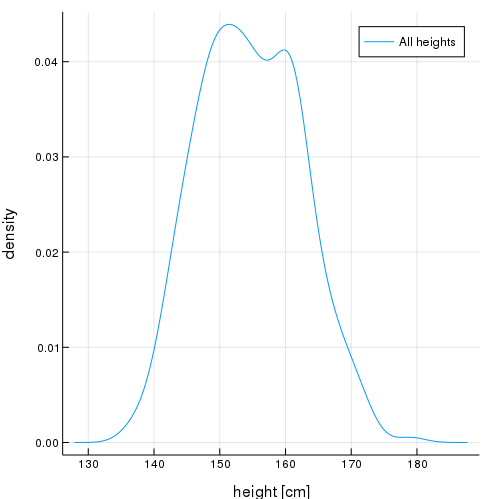

In [6]:
density(df2[:height], lab="All heights", xlab="height [cm]", ylab="density")

Filter on sex to see if it is bi-modal

In [7]:
female_df = filter(row -> row[:male] == 0, df2);
male_df = filter(row -> row[:male] == 1, df2);
first(male_df, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,156.845,53.0419,41.0,1
3,163.83,62.9926,35.0,1
4,168.91,55.48,27.0,1
5,165.1,54.4877,54.0,1


Is it bi-modal?

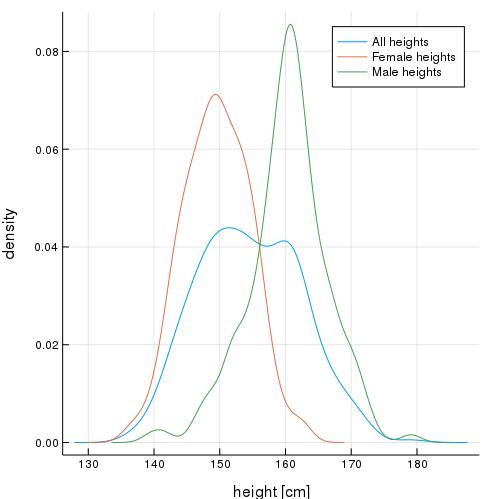

In [8]:
density!(female_df[:height], lab="Female heights")
density!(male_df[:height], lab="Male heights")

Use data from m4.1s

In [9]:
d = JLD.load(joinpath(ProjDir, "m4.1s.jld"))

chn = MCMCChain.Chains(d["a3d"], names=d["names"])

Object of type "Chains{Float64}"

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Union{Missing, Float64}[7.94444 154.404; 7.73601 154.35; … ; 7.40015 154.621; 7.3637 154.708]

Union{Missing, Float64}[7.62987 154.272; 7.83726 155.857; … ; 7.8933 154.944; 7.9148 154.881]

Union{Missing, Float64}[7.77612 154.534; 7.21157 154.647; … ; 8.28728 154.382; 8.35526 154.982]

Union{Missing, Float64}[7.92762 155.313; 7.91956 155.357; … ; 7.4246 154.862; 7.85633 154.274]

Describe the draws

In [10]:
describe(chn)

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
          Mean        SD       Naive SE       MCSE      ESS
sigma   7.7597313 0.29710224 0.0046975989 0.0048228834 1000
   mu 154.5974505 0.40782722 0.0064483146 0.0077518657 1000

Quantiles:
         2.5%       25.0%     50.0%     75.0%     97.5%  
sigma   7.207986   7.553075   7.75278   7.95001   8.37939
   mu 153.783000 154.329000 154.59200 154.87900 155.39800



### snippet 4.13

Plot the density of posterior draws

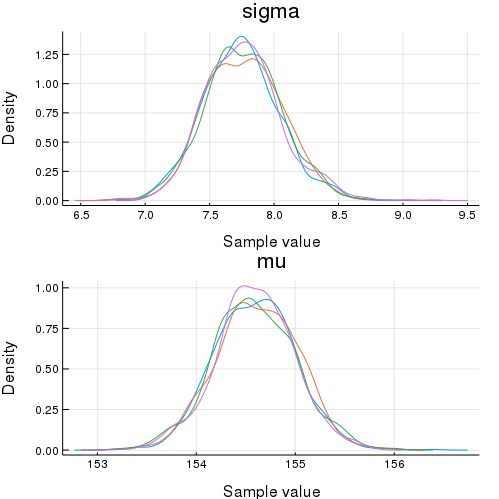

In [11]:
density(chn, lab="All heights", xlab="height [cm]", ylab="density")

End of `clip_07.0s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*